# NOTEBOOK GRUPO 11 ESTADISTICA COMPUTACIONAL
escribir aquí una introducción al trabajo


### Inicialización

In [ ]:
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_habits_performance.csv')
print("Pandas funciona versión:", pd.__version__)

Pandas funciona versión: 2.3.2


## Sobre los datos y nuestra motivación
El dataset *"Strudent Habits vs Academic Performance"*, es una simulación de datos basados en comportamiento realista en estudiantes *college*.  
Estos datos toman una colección de comportamientos de la rutina diaria y las notas de los estudiantes.  
Como grupo estamos interesados en buscar alguna correlación entre estos hábitos y las calificaciones ya que podrían indicar correlaciones que podrían ser interesantes de investigar.  
**Variables:**  
    **- Edad:** Edad del estudiante.  
    **- Género:** Genero del estudiante.  
    **- Horas de estudio:** Horas que el estudiante dedica a estudiar diariamente.  
    **- Redes Sociales:** Horas diarias de uso de redes sociales.  
    **- Netflix:** Horas diarias de visualización de netflix.  
    **- Trabajo a medio tiempo:** Si/No tiene un trabajo a medio tiempo.  
    **- Asistencia:** Porcentaje de asistencia a clases.  
    **- Horas de sueño:** Horas de sueño diarias.  
    **- Dieta:** Good/Fair/Poor, indica la calidad de su dieta alimenticia.  
    **- Frecuecia de ejercicio:** No indica en base a qué se está midiendo.  
    **- Educación de los padres:** Nivel más alto de educación alcanzado por los padres.  
    **- Internet:** Good/Average/Poor Calidad del internet.  
    **- Salud Mental:** Evaluación, del 1 al 10, de su salud mental.  
    **- Extracurricular:** Si/No participa en actividades extracurriculares.  
    **- Nota:** Nota de su exámen.

## PRIMERA ENTREGA

### LIMPIEZA DE DATOS 
El dataset elegido cuenta con 1000 observaciones y 16 columnas.  
Analizamos el dataset en busca de datos nulos, se eliminaran las observaciones que tengan datos nulos en algunas de sus columnas.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Podemos notar que en la columna ***parental_education_level*** existen 91 observaciones que tienen ese campo nulo.  
Eliminamos las observaciones nulas con `df.dropna()`

In [8]:
df = df.dropna()
print("Filas:",df.shape[0])
print("Columnas:",df.shape[1])
print("\nEsta es una muestra de como se ven los datos:")
df.head()

Filas: 909
Columnas: 16

Esta es una muestra de como se ven los datos:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Descripición de las variables y los datos
Primero crearemos un diccionario para poder identificar los tipos de variables que trabajaremos. El diccionario guardará como key el nombre de la columna y como valor el tipo de dato de la variable, las que podrán ser:  
* Categóricas
* Discretas
* Continuas  

También crearemos una lista por cada tipo de variable.

In [9]:
dict_TipoVariable={}
varCategoricas=[]
varDiscretas=[]
varContinuas=[]
for columna, tipo in df.dtypes.items():
    if (tipo=="object"):
        dict_TipoVariable[columna]="Categorica"
        varCategoricas.append(columna)
    elif(tipo=="int64"):
        dict_TipoVariable[columna]="Discreta"
        varDiscretas.append(columna)
    else:
        dict_TipoVariable[columna]="Continua"
        varContinuas.append(columna)
        
print("Variables categóricas: ",varCategoricas)
print("Variables continuas: ",varContinuas)
print("Variables discretas:", varDiscretas)

Variables categóricas:  ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Variables continuas:  ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']
Variables discretas: ['age', 'exercise_frequency', 'mental_health_rating']


### Estadísticos


#### min, max, promedio y correlacion
Calculamos el mínimo, máximo y promedio de cada variable numérica existente en nuestro dataset.  
En la celda subsiguiente calculamos la correlación entre las variables. Los datos de la correlación varían entre -1 y 1.  
* Valores cercanos a 1 en la correlación indican que existe una tendencia directamente proporcional entre los datos.  
* Valores cercanos a 1 indican la existencia de una tendencia inversamente proporcional entre los datos.
* Valores cercanos a 0 indican que los datos no tienen implicancia entre sí.

In [10]:
varNumericas = varContinuas+varDiscretas
df[varNumericas].agg(["min","max","mean"]).T


,min,max,mean
study_hours_per_day,0.0,8.3,3.538724
social_media_hours,0.0,7.2,2.504620
netflix_hours,0.0,5.4,1.830363
attendance_percentage,56.0,100.0,83.880308
sleep_hours,3.2,10.0,6.474037
exam_score,18.4,100.0,69.558196
age,17.0,24.0,20.475248
exercise_frequency,0.0,6.0,3.051705
mental_health_rating,1.0,10.0,5.466447


In [11]:
df[varNumericas].corr()

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exam_score,age,exercise_frequency,mental_health_rating
study_hours_per_day,1.000000,0.007364,-0.014493,0.028967,-0.026241,0.822950,0.007150,-0.024708,-0.015896
social_media_hours,0.007364,1.000000,0.011865,0.049356,0.026861,-0.171672,-0.023854,-0.023975,-0.000417
netflix_hours,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.166578,0.005841,-0.004155,-0.016612
attendance_percentage,0.028967,0.049356,-0.015008,1.000000,0.001972,0.096005,-0.030203,-0.010563,-0.017096
sleep_hours,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.122294,0.040498,0.030013,-0.010653
exam_score,0.822950,-0.171672,-0.166578,0.096005,0.122294,1.000000,-0.012833,0.161397,0.317945
age,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.012833,1.000000,-0.005718,-0.052137
exercise_frequency,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,0.161397,-0.005718,1.000000,-0.001500
mental_health_rating,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,0.317945,-0.052137,-0.001500,1.000000


#### Outliers
Obtenemos las anomalías y las agregamos a un diccionario que contiene la cantidad de outliers por cada variable.  
En la siguiente celda obtenemos la fila y el valor del outlier respectivamente.
En la celda subsiguiente recorremos el diccionario de outliers.

In [12]:
outliers_dict = {}

for columna in varNumericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3-Q1
    
    outliers=df[(df[columna]<Q1-IQR*1.5) | (df[columna]>Q3+IQR*1.5)][columna]
    outliers_dict[columna]=outliers
    print(columna, "tiene los siguientes outliers: ")
    print(outliers, "\n")



study_hours_per_day tiene los siguientes outliers: 
455    8.3
797    8.2
875    7.6
Name: study_hours_per_day, dtype: float64 

social_media_hours tiene los siguientes outliers: 
346    6.0
361    6.1
641    5.7
735    7.2
Name: social_media_hours, dtype: float64 

netflix_hours tiene los siguientes outliers: 
556    5.4
822    5.3
Name: netflix_hours, dtype: float64 

attendance_percentage tiene los siguientes outliers: 
651    57.6
706    56.7
971    56.0
Name: attendance_percentage, dtype: float64 

sleep_hours tiene los siguientes outliers: 
955    10.0
Name: sleep_hours, dtype: float64 

exam_score tiene los siguientes outliers: 
265    18.4
327    23.1
Name: exam_score, dtype: float64 

age tiene los siguientes outliers: 
Series([], Name: age, dtype: int64) 

exercise_frequency tiene los siguientes outliers: 
Series([], Name: exercise_frequency, dtype: int64) 

mental_health_rating tiene los siguientes outliers: 
Series([], Name: mental_health_rating, dtype: int64) 



In [13]:
for columna in outliers_dict:
    print(f"{columna} tiene {len(outliers_dict[columna])} outliers")

study_hours_per_day tiene 3 outliers
social_media_hours tiene 4 outliers
netflix_hours tiene 2 outliers
attendance_percentage tiene 3 outliers
sleep_hours tiene 1 outliers
exam_score tiene 2 outliers
age tiene 0 outliers
exercise_frequency tiene 0 outliers
mental_health_rating tiene 0 outliers


#### Variables categóricas

Dentro de nuestras variables categóricas la más llamativa es ***gender***. Esta columna principal nos permite visualizar de una mejor manera la muestra obtenida y poder hacer un estudio bastante amplio.  
Estudiaremos el dataset bajo esta variable categórica en las siguientes celdas.

In [38]:
print("Datos a considerar de las variables categoricas:")
df.describe(include=["object"])


Datos a considerar de las variables categoricas:


,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


##### Análisis de datos en base al género

In [ ]:
df["gender"].value_counts()


gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

In [26]:
pd.crosstab(df["gender"], df["age"])

age,17,18,19,20,21,22,23,24
gender,,,,,,,,
Female,53,53,53,70,59,55,42,48
Male,64,52,46,60,49,45,56,68
Other,4,4,2,7,6,2,6,5


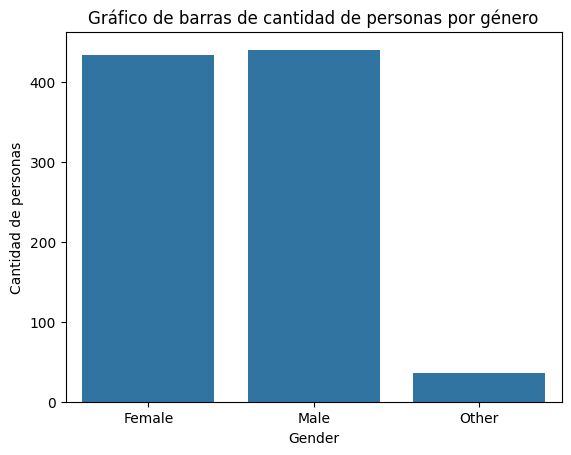

In [53]:
sns.countplot(x="gender", data=df)
plt.title("Gráfico de barras de cantidad de personas por género")
plt.xlabel("Gender")
plt.ylabel("Cantidad de personas")
plt.show()

In [ ]:
df.groupby("gender")["exam_score"].agg(["min", "max", "mean"])

,min,max,mean
gender,,,
Female,18.4,100.0,69.978522
Male,23.1,100.0,68.970227
Other,43.9,100.0,71.688889


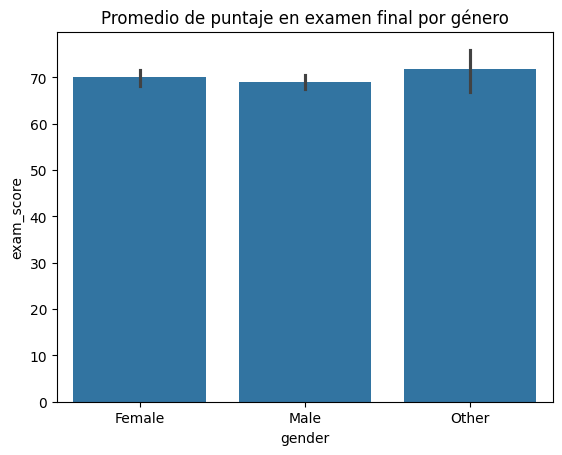

In [59]:
sns.barplot(x="gender", y="exam_score", data=df, estimator="mean")
plt.title("Promedio de puntaje en examen final por género")
plt.show()

In [60]:
df.groupby("gender")["study_hours_per_day"].agg(["min", "max", "mean"])

,min,max,mean
gender,,,
Female,0.0,7.6,3.591917
Male,0.0,8.3,3.472727
Other,1.5,5.6,3.705556


#### Visualización de datos y relaciones

##### Nota final del examen

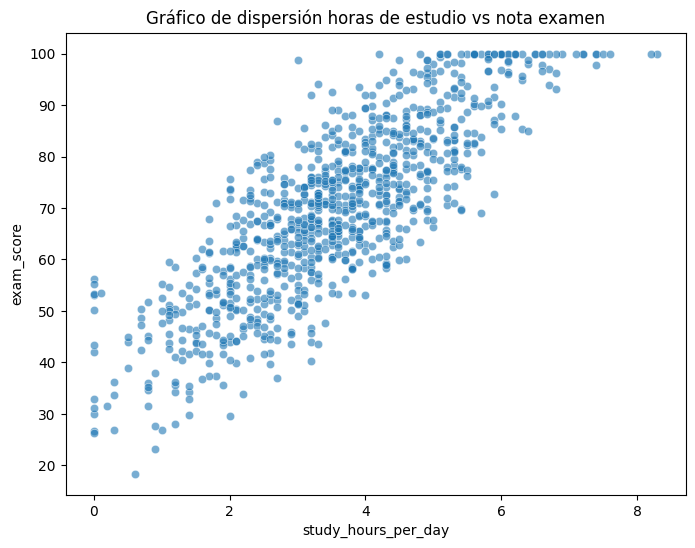

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="study_hours_per_day", y="exam_score", alpha=0.6)
plt.title("Gráfico de dispersión horas de estudio vs nota examen")
plt.show()

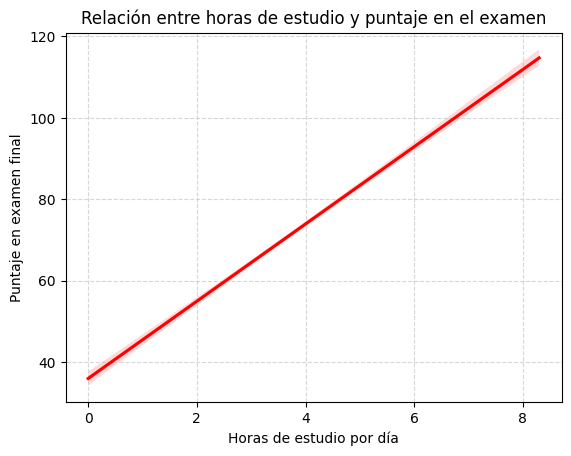

In [63]:
sns.regplot(data=df, x="study_hours_per_day", y="exam_score", scatter=False, color="red")

plt.title("Relación entre horas de estudio y puntaje en el examen", fontsize=12)
plt.xlabel("Horas de estudio por día")
plt.ylabel("Puntaje en examen final")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

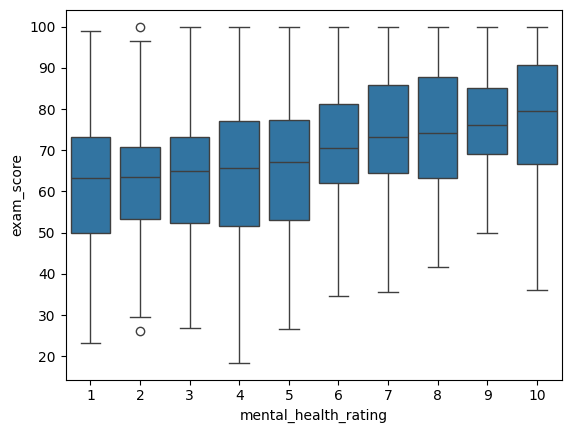

In [ ]:
sns.boxplot(data=df, x="mental_health_rating", y="exam_score")
plt.show()

<Axes: xlabel='gender', ylabel='exam_score'>

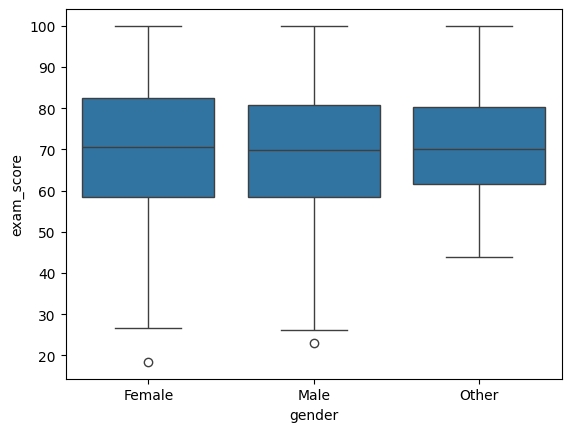

In [37]:
sns.boxplot(data=df, x="gender", y="exam_score")

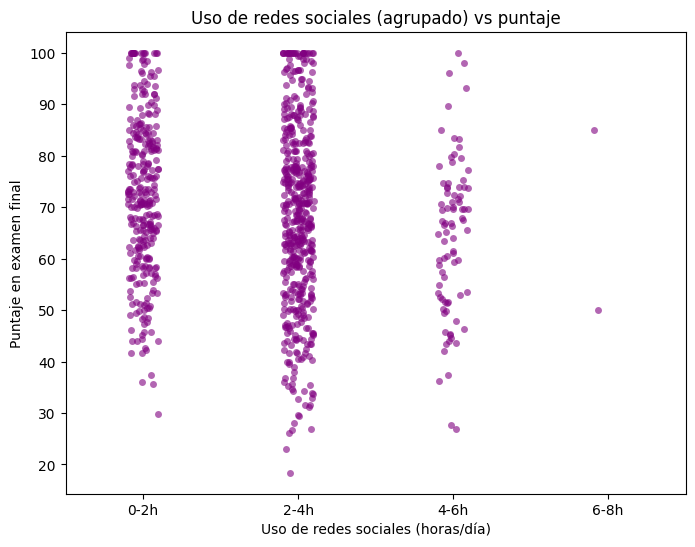

In [46]:
df["social_media_group"] = pd.cut(df["social_media_hours"], bins=[0,2,4,6,8], labels=["0-2h","2-4h","4-6h","6-8h"])

plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="social_media_group", y="exam_score", 
              jitter=True, alpha=0.6, color="purple")

plt.title("Uso de redes sociales (agrupado) vs puntaje")
plt.xlabel("Uso de redes sociales (horas/día)")
plt.ylabel("Puntaje en examen final")

plt.show()

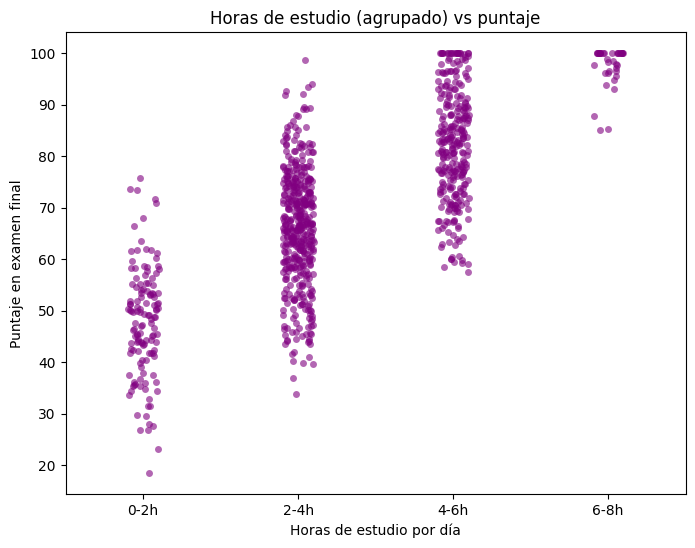

In [67]:
df["study_hours_group"] = pd.cut(df["study_hours_per_day"], bins=[0,2,4,6,8], labels=["0-2h","2-4h","4-6h","6-8h"])
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="study_hours_group", y="exam_score", 
              jitter=True, alpha=0.6, color="purple")

plt.title("Horas de estudio (agrupado) vs puntaje")
plt.xlabel("Horas de estudio por día")
plt.ylabel("Puntaje en examen final")

plt.show()